<a href="https://colab.research.google.com/github/meriemdouider1/mois1-mois2/blob/main/FeatureSelection/R1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score, r2_score
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import numpy
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
import numpy as np
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import matthews_corrcoef
from sklearn.svm import SVC
from sklearn.metrics import cohen_kappa_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from sklearn.metrics import recall_score

In [3]:
Cl = '/content/cs-longia.xlsx' 
data= pd.read_excel(Cl, sheet_name=0,header=0,index_col=False, keep_default_na=True)

In [4]:
del data["Source"] 
del data["CodeSite"] 
data

,X_long,Y_lat,Cs_longia,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,...,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.911420,23.794740,1,0.000000,0.000000,0.000000,0.000000,0.624435,0,97,...,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.188370,27.132950,1,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,...,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.188370,27.132950,1,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,...,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.185620,27.157940,0,0.000000,0.000000,0.000000,0.000000,0.269410,0,100,...,5.1,5.6,5.5,6.2,6.2,6.2,5.7,4.1,3.7,3.9
4,-13.167180,27.157730,0,0.000000,0.000000,0.000000,0.000000,0.379107,0,100,...,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,-5.366667,35.766667,1,8.495770,105.550156,8.691405,15.116930,0.698221,0,0,...,4.6,4.3,4.1,3.9,3.9,4.1,4.0,4.0,4.0,4.2
250,-5.816667,35.783333,1,0.000000,0.000000,0.000000,0.000000,1.725019,0,0,...,4.6,4.1,3.8,3.7,3.7,3.7,3.3,3.6,3.8,4.0
251,-5.366667,35.833333,1,7.411978,111.459663,7.364459,15.054404,0.991284,0,0,...,4.5,4.3,4.0,4.0,3.9,4.0,3.9,4.0,3.9,4.3
252,-5.558611,35.841944,1,5.696193,5.641273,0.602672,4.306276,0.000000,0,0,...,4.6,4.0,3.8,4.1,3.7,3.4,3.6,3.6,3.4,3.6


In [9]:
X= data.loc[:, data.columns != 'Cs_longia']
Y= data.Cs_longia

In [6]:
pip install ITMO_FS

     |████████████████████████████████| 70 kB 2.6 MB/s 
     |████████████████████████████████| 121 kB 6.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for quadprog: filename=quadprog-0.1.11-cp37-cp37m-linux_x86_64.whl size=290766 sha256=8eb90583e51dd6285d35e95c959f9b214cbf2d10e248545510b2bb1f64ae98d0
  Stored in directory: /root/.cache/pip/wheels/4a/4e/d7/41034ea11aeef1266df3cae546116cb6094e955c41ae3e2589
Successfully built quadprog


In [7]:
from ITMO_FS.filters.univariate import reliefF_measure

In [10]:
X1=X.to_numpy()

In [11]:
X1

array([[-1.59114200e+01,  2.37947400e+01,  0.00000000e+00, ...,
         5.40000010e+00,  5.50000000e+00,  4.90000010e+00],
       [-1.31883700e+01,  2.71329500e+01,  2.14420957e-04, ...,
         4.30000019e+00,  3.70000005e+00,  3.79999995e+00],
       [-1.31883700e+01,  2.71329500e+01,  2.14420957e-04, ...,
         4.30000019e+00,  3.70000005e+00,  3.79999995e+00],
       ...,
       [-5.36666700e+00,  3.58333330e+01,  7.41197777e+00, ...,
         4.00000000e+00,  3.90000010e+00,  4.30000019e+00],
       [-5.55861100e+00,  3.58419440e+01,  5.69619274e+00, ...,
         3.59999990e+00,  3.40000010e+00,  3.59999990e+00],
       [-5.48333300e+00,  3.59000000e+01,  6.83951378e+00, ...,
         4.00000000e+00,  4.00000000e+00,  4.19999981e+00]])

In [12]:
Y1=Y.to_numpy()

In [13]:
Y1

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [14]:
scores = reliefF_measure(X1, Y1)

In [15]:
scores

array([ 2.14281183e-02,  1.33019136e-02,  2.15918507e-02,  1.25523282e-02,
        2.11632404e-02,  9.24776355e-03,  2.16518436e-02,  8.17686251e-03,
        5.11811024e-03,  4.48004344e-03, -1.45231846e-02, -5.90551181e-03,
        4.92125984e-03,  2.05862821e-02,  5.19466317e-02,  2.85826772e-02,
       -6.80028633e-03,  2.36220472e-04,  1.28147657e-02,  4.99416740e-03,
        1.28317294e-02,  3.10328856e-02,  2.37678624e-02,  3.59955006e-02,
        1.81102362e-02,  2.28443667e-02,  1.61607823e-02,  1.25653102e-02,
        1.05886462e-02,  3.01329981e-02,  1.42634056e-02,  0.00000000e+00,
       -1.35007298e-03,  2.55106119e-02,  2.22513852e-02,  4.60823545e-02,
        5.92623291e-03,  1.57480315e-02,  7.48031496e-02,  2.54265092e-03,
       -2.41833912e-03, -5.49266229e-04, -1.38683538e-03,  1.71095328e-02,
        2.28999327e-02,  2.99152947e-02, -3.17873349e-03,  1.78366105e-02,
        1.20963140e-02,  2.13141461e-02,  4.26509186e-03,  2.16535433e-02,
        1.96850394e-02,  

In [16]:
scores_data=pd.DataFrame(scores)

In [17]:
scores_data

,0
0,0.021428
1,0.013302
2,0.021592
3,0.012552
4,0.021163
...,...
220,0.030323
221,0.039764
222,0.034941
223,0.029875


In [18]:
scores_data.to_excel("scores.xlsx")

In [20]:
feature_selected=["VarT_tri_TempJ","Geom_unif","Vent_Janv","Pl_herb","Ph3_NDVI","Vent_Mars","Geom_Shan","Vent_Fev","Amp3_TempJ","Ph2_EVI","Ph2_NDVI","Ph1_EVI","Vent_Sept","Bio_Tj_Moy","Vent_Dec","VarT_bi_IRM","VarT_ann_NDVI","Amp3_NDVI","Vent_Oct","Tmax_Aout","Bio_Tsec_Moy","Bio_Tint","Amp3_EVI"]
XR=X[feature_selected]

In [21]:
XR

,VarT_tri_TempJ,Geom_unif,Vent_Janv,Pl_herb,Ph3_NDVI,Vent_Mars,Geom_Shan,Vent_Fev,Amp3_TempJ,Ph2_EVI,...,Bio_Tj_Moy,Vent_Dec,VarT_bi_IRM,VarT_ann_NDVI,Amp3_NDVI,Vent_Oct,Tmax_Aout,Bio_Tsec_Moy,Bio_Tint,Amp3_EVI
0,0,0.579282,4.8,0,166,6.1,0.482578,5.6,7,419,...,7.125000,4.9,2,2,2,5.4,26.200001,19.866667,12.000000,15
1,1,1.000000,4.2,0,171,4.8,0.000000,4.1,31,243,...,9.816667,3.8,0,13,1,4.3,29.700001,22.166667,17.700001,4
2,1,1.000000,4.2,0,171,4.8,0.000000,4.1,31,243,...,9.816667,3.8,0,13,1,4.3,29.700001,22.166667,17.700001,4
3,0,0.164062,4.2,0,217,5.1,1.213008,4.5,23,372,...,9.558333,3.9,0,8,0,4.1,29.700001,24.383334,17.400001,2
4,1,0.109761,4.2,0,123,5.0,1.391740,4.2,33,21,...,9.616666,3.8,0,1,2,4.2,29.900000,22.433334,17.500000,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,0,0.205729,4.1,0,6,4.6,1.124670,4.6,5,459,...,5.891667,4.2,2,52,7,4.0,27.700001,23.433334,18.300001,110
250,0,0.191262,3.7,0,364,4.6,1.060958,4.3,1,457,...,5.225000,4.0,0,51,5,3.6,27.299999,23.433333,17.699999,59
251,0,0.095390,4.0,0,355,4.5,1.494175,4.4,6,496,...,5.858334,4.3,4,84,17,4.0,27.600000,23.416666,18.200001,99
252,0,0.083140,3.9,12,362,4.6,1.890363,3.9,0,486,...,7.066666,3.6,4,37,15,3.6,26.799999,22.650000,18.299999,23


In [22]:
def tp(y_true, y_pred):
  specificite= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
  return specificite
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred):
  MCC= matthews_corrcoef(y_true, y_pred) 
  return MCC
my_scorer1 = make_scorer(tp1, greater_is_better=True)

XGBClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

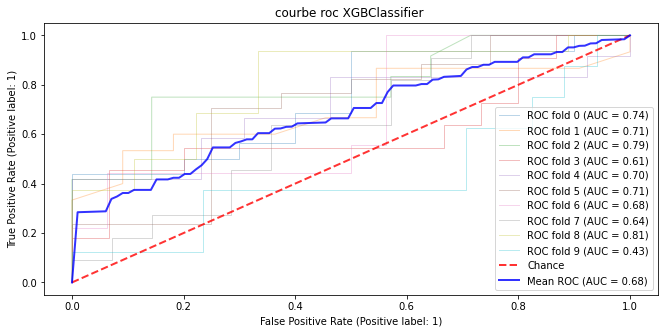

Accuracy: [0.57692308 0.61538462 0.80769231 0.65384615 0.64       0.64
 0.48       0.56       0.68       0.48      ]
moy_accuracy: 0.61
precision: [0.69230769 0.69230769 0.81818182 0.6        0.58823529 0.83333333
 0.33333333 0.5        0.78571429 0.27272727]
moy_precision: 0.61
sensibilité : [0.5625     0.6        0.75       0.54545455 0.83333333 0.58823529
 0.44444444 0.45454545 0.6875     0.375     ]
moy_sensibilité: 0.58
spécificité : [0.6        0.63636364 0.85714286 0.73333333 0.46153846 0.75
 0.5        0.64285714 0.66666667 0.52941176]
moy_spécificité: 0.64
MCC : [ 0.15811388  0.23354968  0.61263747  0.28311043  0.31581015  0.31581015
 -0.05337605  0.09869275  0.34247476 -0.08982837]
MCC: 0.22
LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818:

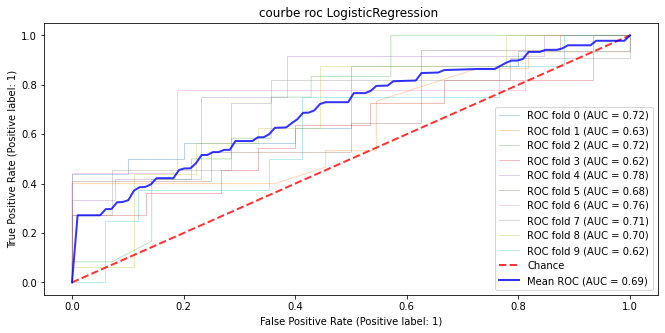

Accuracy: [0.57692308 0.53846154 0.65384615 0.57692308 0.72       0.56
 0.76       0.64       0.6        0.56      ]
moy_accuracy: 0.62
precision: [0.69230769 0.66666667 0.58823529 0.5        0.72727273 0.71428571
 0.8        0.625      0.75       0.33333333]
moy_precision: 0.64
sensibilité : [0.5625     0.4        0.83333333 0.72727273 0.66666667 0.58823529
 0.44444444 0.45454545 0.5625     0.375     ]
moy_sensibilité: 0.56
spécificité : [0.6        0.72727273 0.5        0.46666667 0.76923077 0.5
 0.9375     0.78571429 0.66666667 0.64705882]
moy_spécificité: 0.66
MCC : [0.15811388 0.13216961 0.34929122 0.19694639 0.43871881 0.0829185
 0.45833333 0.25566537 0.22017621 0.02143732]
MCC: 0.23
RandomForestClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

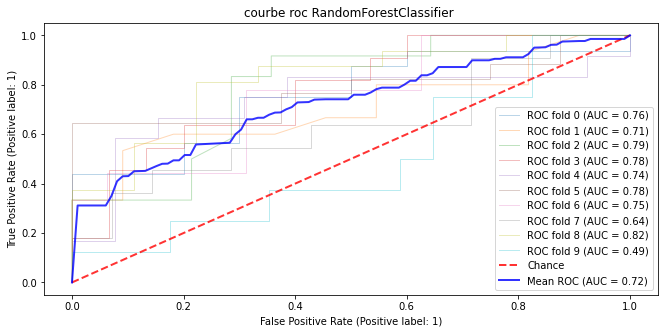

Accuracy: [0.65384615 0.65384615 0.76923077 0.65384615 0.72       0.76
 0.8        0.52       0.6        0.52      ]
moy_accuracy: 0.67
precision: [0.8        0.81818182 0.71428571 0.7        0.66666667 1.
 0.5        0.5        0.8        0.3       ]
moy_precision: 0.68
sensibilité : [0.5        0.6        0.66666667 0.54545455 0.75       0.64705882
 0.66666667 0.54545455 0.625      0.375     ]
moy_sensibilité: 0.59
spécificité : [0.8        0.81818182 0.57142857 0.8        0.69230769 1.
 0.625      0.71428571 0.77777778 0.58823529]
moy_spécificité: 0.74
MCC : [ 0.35696532  0.45944674  0.46291005  0.35874608  0.36774959  0.65908204
  0.55377653  0.09869275  0.44226898 -0.035007  ]
MCC: 0.37
GradientBoostingClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

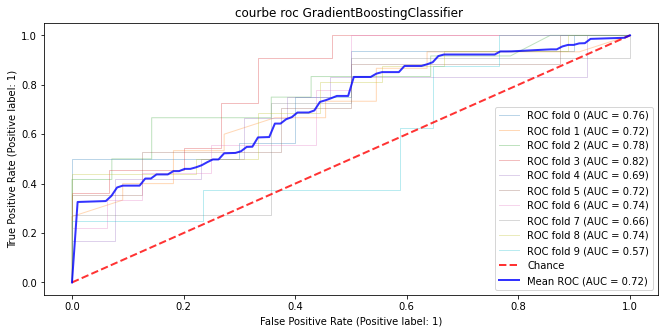

Accuracy: [0.61538462 0.65384615 0.69230769 0.65384615 0.6        0.6
 0.64       0.6        0.56       0.44      ]
moy_accuracy: 0.61
precision: [0.75       0.71428571 0.66666667 0.625      0.55555556 0.76923077
 0.5        0.54545455 0.72727273 0.25      ]
moy_precision: 0.61
sensibilité : [0.5625     0.66666667 0.66666667 0.45454545 0.83333333 0.58823529
 0.77777778 0.54545455 0.5        0.375     ]
moy_sensibilité: 0.60
spécificité : [0.7        0.63636364 0.71428571 0.8        0.38461538 0.625
 0.5625     0.64285714 0.66666667 0.47058824]
moy_spécificité: 0.62
MCC : [ 0.25617377  0.30031249  0.38095238  0.27247463  0.24251095  0.1990977
  0.32904438  0.18831169  0.16116459 -0.1441742 ]
MCC: 0.22
Gaussian


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

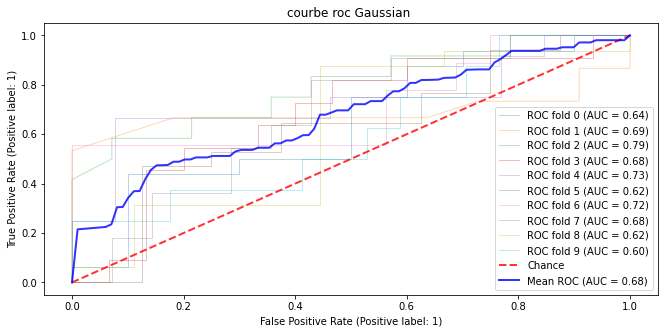

Accuracy: [0.5        0.73076923 0.65384615 0.65384615 0.68       0.6
 0.56       0.6        0.48       0.56      ]
moy_accuracy: 0.60
precision: [0.61538462 0.83333333 0.6        0.58333333 0.66666667 0.81818182
 0.41666667 0.55555556 0.63636364 0.33333333]
moy_precision: 0.61
sensibilité : [0.5        0.66666667 0.75       0.63636364 0.66666667 0.52941176
 0.55555556 0.45454545 0.4375     0.375     ]
moy_sensibilité: 0.56
spécificité : [0.5        0.81818182 0.57142857 0.66666667 0.69230769 0.75
 0.5625     0.71428571 0.55555556 0.64705882]
moy_spécificité: 0.65
MCC : [ 0.          0.48049998  0.32433749  0.30031249  0.35897436  0.26257525
  0.11342411  0.17459498 -0.00671519  0.02143732]
MCC: 0.20
KNN


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

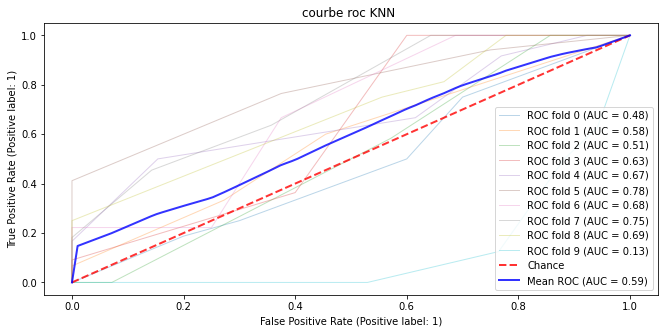

Accuracy: [0.46153846 0.57692308 0.5        0.5        0.52       0.6
 0.64       0.64       0.64       0.2       ]
moy_accuracy: 0.53
precision: [0.57142857 0.64285714 0.46666667 0.4        0.5        1.
 0.5        0.58333333 0.70588235 0.07142857]
moy_precision: 0.54
sensibilité : [0.5        0.6        0.58333333 0.36363636 0.66666667 0.41176471
 0.66666667 0.63636364 0.75       0.125     ]
moy_sensibilité: 0.53
spécificité : [0.4        0.54545455 0.42857143 0.6        0.38461538 1.
 0.625      0.64285714 0.44444444 0.23529412]
moy_spécificité: 0.53
MCC : [-0.09759001  0.14414999  0.0120125  -0.03692745  0.05337605  0.42779263
  0.28022427  0.27742513  0.20008168 -0.60115912]
MCC: 0.07


In [25]:
classifiers = {
"XGBClassifier": XGBClassifier(scale_pos_weight=1,learning_rate=0.5,max_depth=5,n_estimators=150,objective="binary:logistic"),
"LogisticRegression": LogisticRegression(max_iter=1500, solver='lbfgs', class_weight='balanced'),
"RandomForestClassifier": RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=5 ,min_samples_split=3),
"GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=3, max_depth=5, random_state=0,min_samples_leaf=2,subsample=1 ),
"Gaussian":GaussianNB(),
"KNN":KNeighborsClassifier(n_neighbors=5)
}
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC

my_scorer1 = make_scorer(tp1, greater_is_better=True)
cv = KFold(n_splits=10, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split( XR, Y)):
         clf.fit( XR.loc[train,], Y.loc[train,])
         viz = plot_roc_curve(clf,  XR.loc[test,], Y.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf,  XR, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, XR, Y, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf,  XR, Y, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, XR, Y, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, XR, Y, scoring=my_scorer1, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))